## Check for GPU

In [ ]:
!nvidia-smi
#this is used to underdtand gpu metrics

Sat Nov  4 09:53:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8 -> pretrianed model
## Install roboflow -> Data Annotation

In [ ]:
!pip install roboflow
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 kB 10.9 MB/s eta 0:00:00


In [ ]:
from IPython import display
display.clear_output()

from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.206 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.2/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


rf = Roboflow(api_key="ZUn25xplWxZPgBqSGJyv")
project = rf.workspace("computer-vision-class-c1fka").project("seats-railway")
dataset = project.version(8).download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.206, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Seats-railway-8 in yolov8:: 100%|██████████| 312/312 [00:00<00:00, 7187.91it/s]


## Training

In [ ]:
#get model
model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:00<00:00, 279MB/s]


In [ ]:
%cd {HOME}

history = model.train(data = f"{dataset.location}/data.yaml", epochs = 50, imgsz = 640, verbose=True, plots= True)

/content


Ultralytics YOLOv8.0.206 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/datasets/Seats-railway-8/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, 

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
#sets up environment, binary system, keeps the formating the same

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   P_curve.png	     train_batch2.jpg
confusion_matrix_normalized.png			   PR_curve.png      train_batch320.jpg
confusion_matrix.png				   R_curve.png	     train_batch321.jpg
events.out.tfevents.1699091670.9c631fa0c66a.392.0  results.csv	     train_batch322.jpg
F1_curve.png					   results.png	     val_batch0_labels.jpg
labels_correlogram.jpg				   train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					   train_batch1.jpg  weights


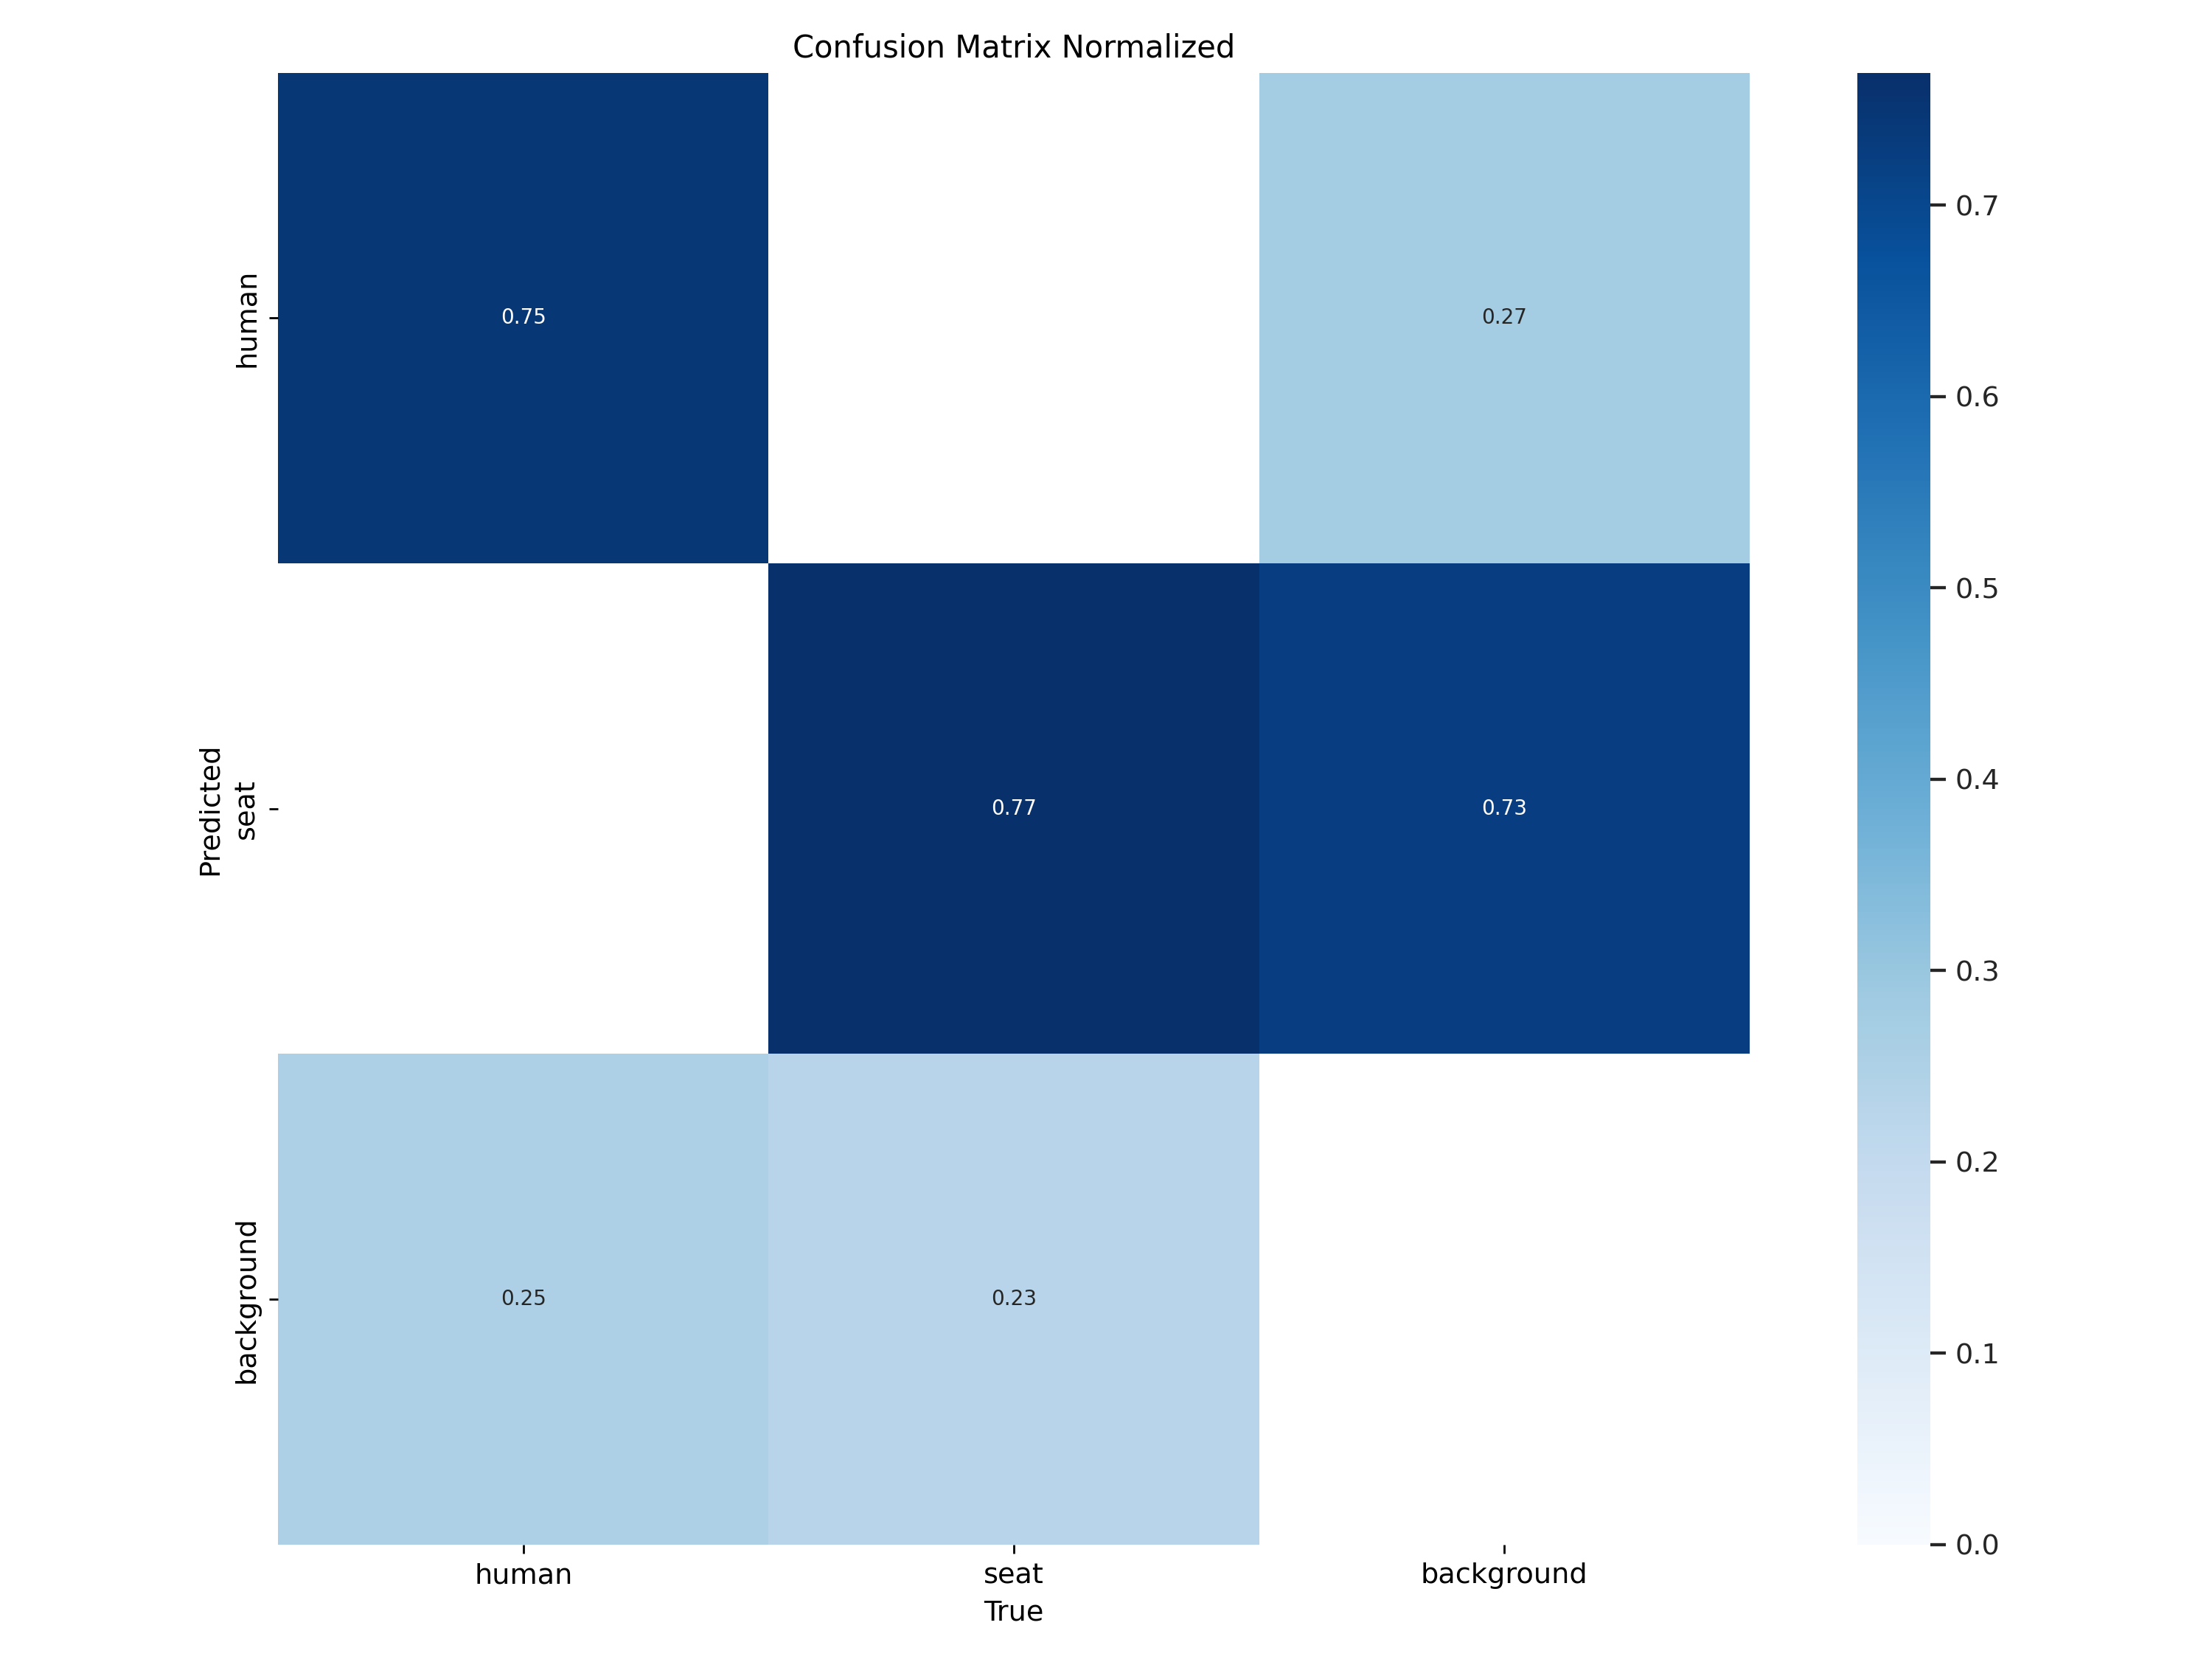

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600)

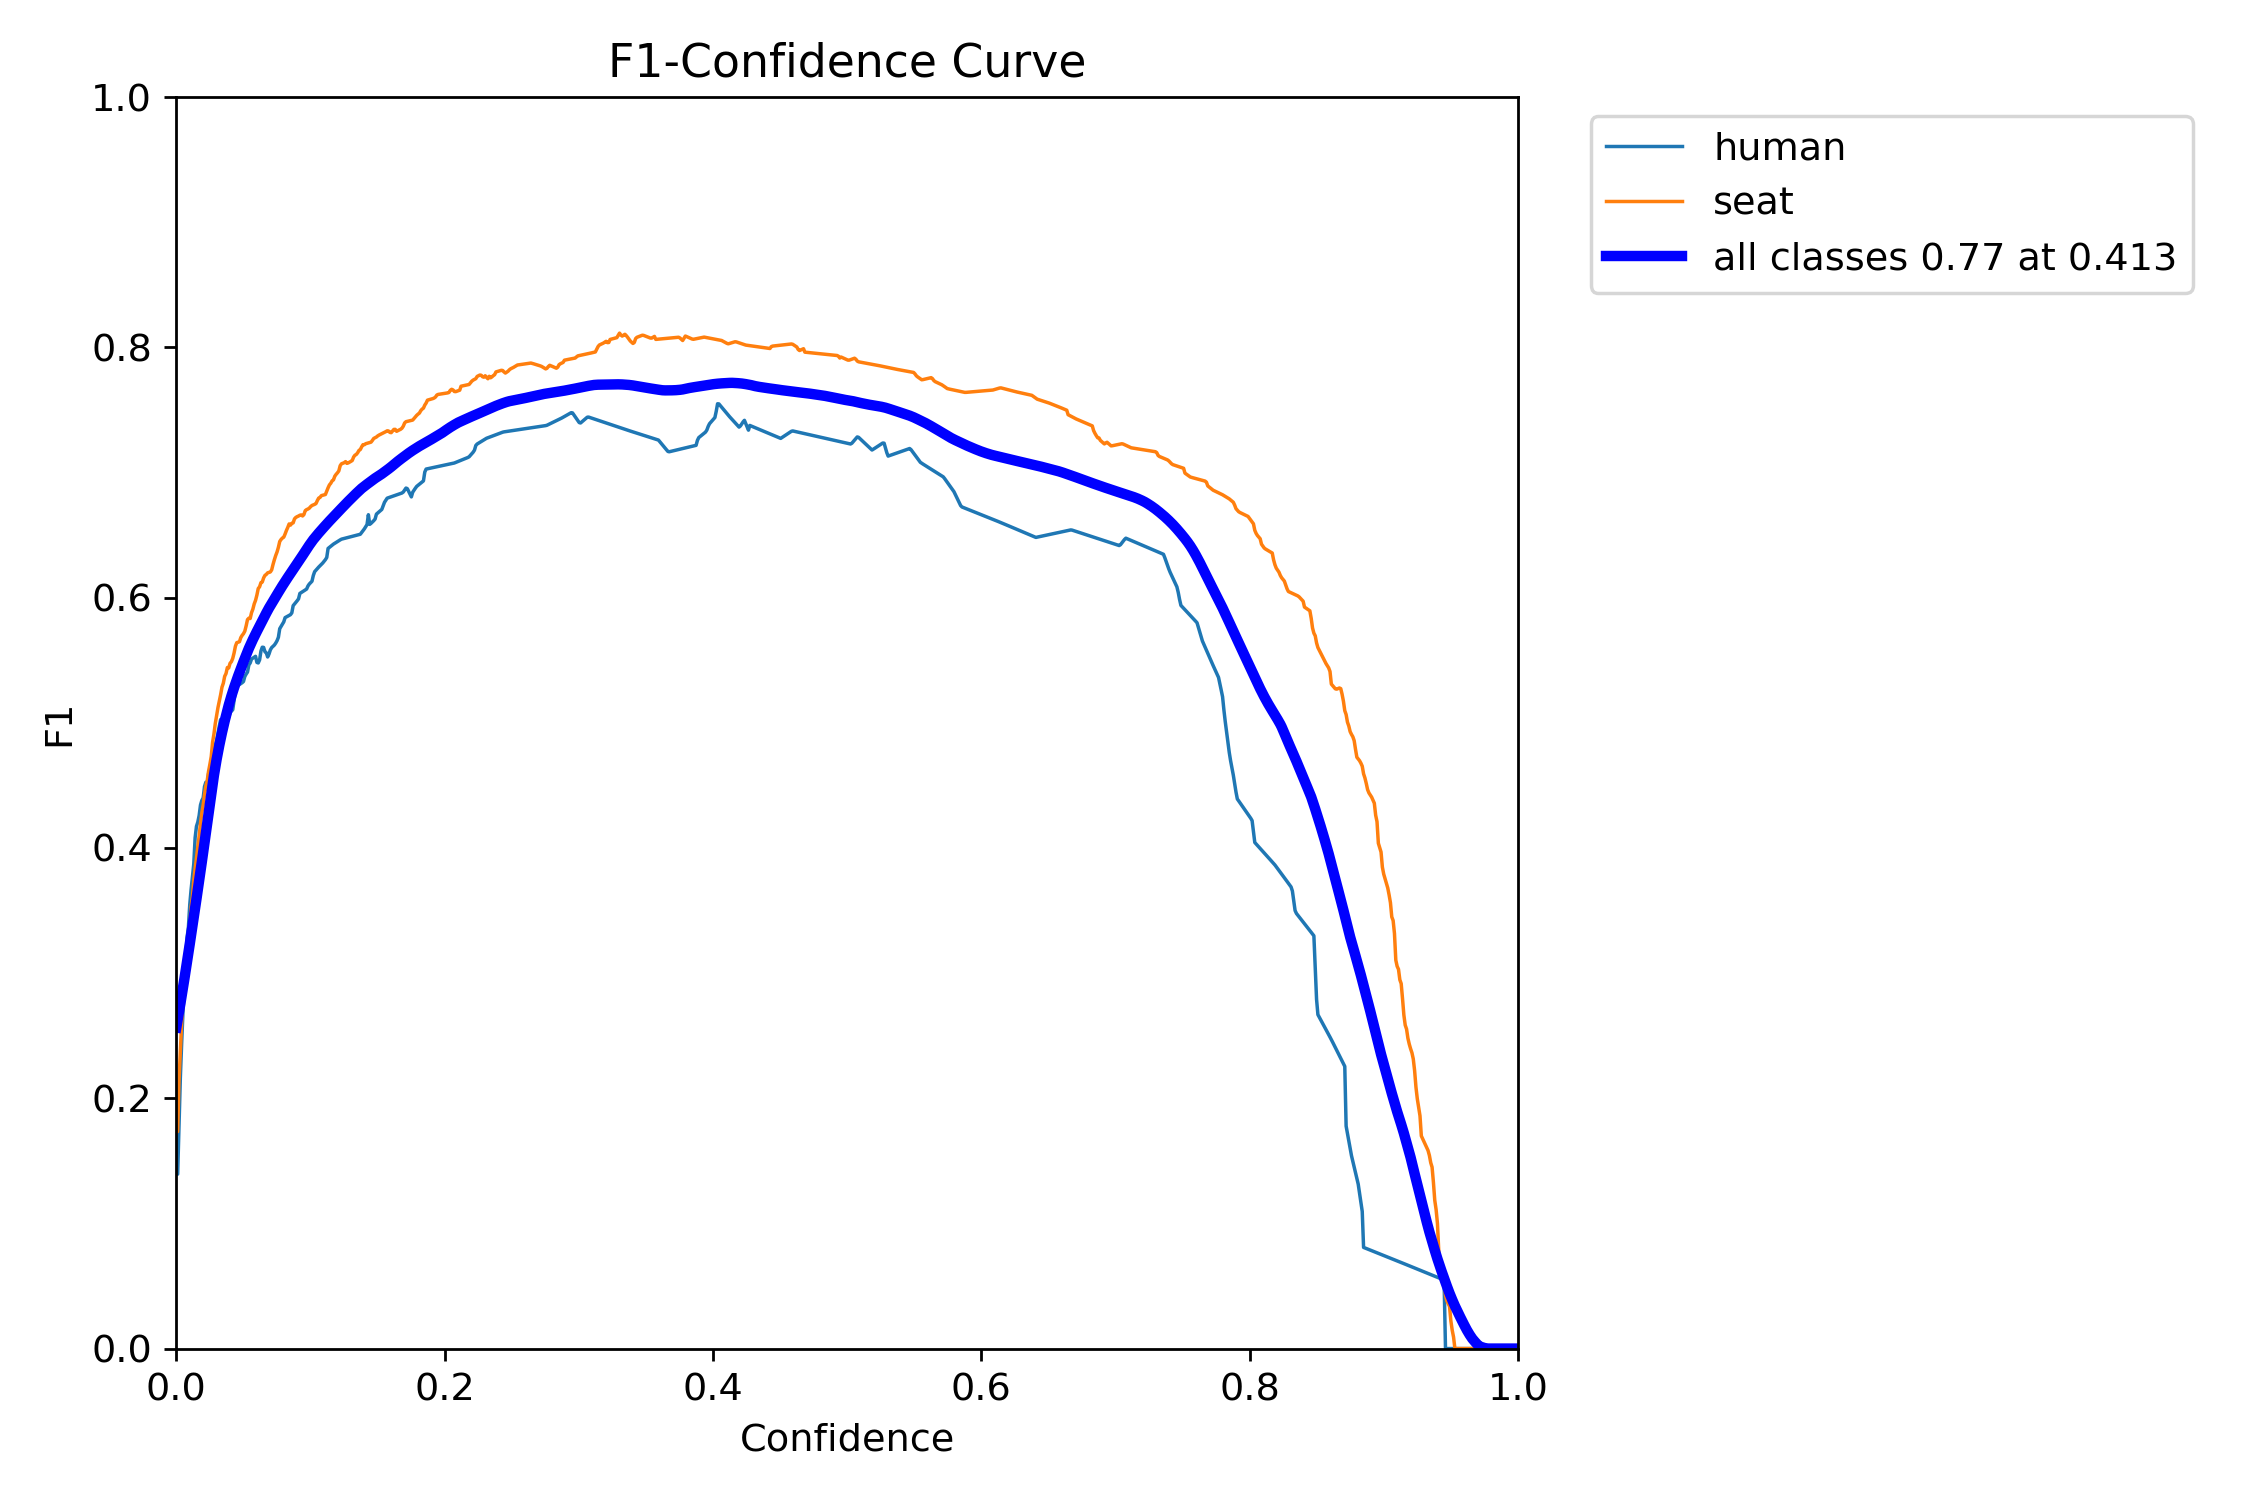

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600,height = 300)

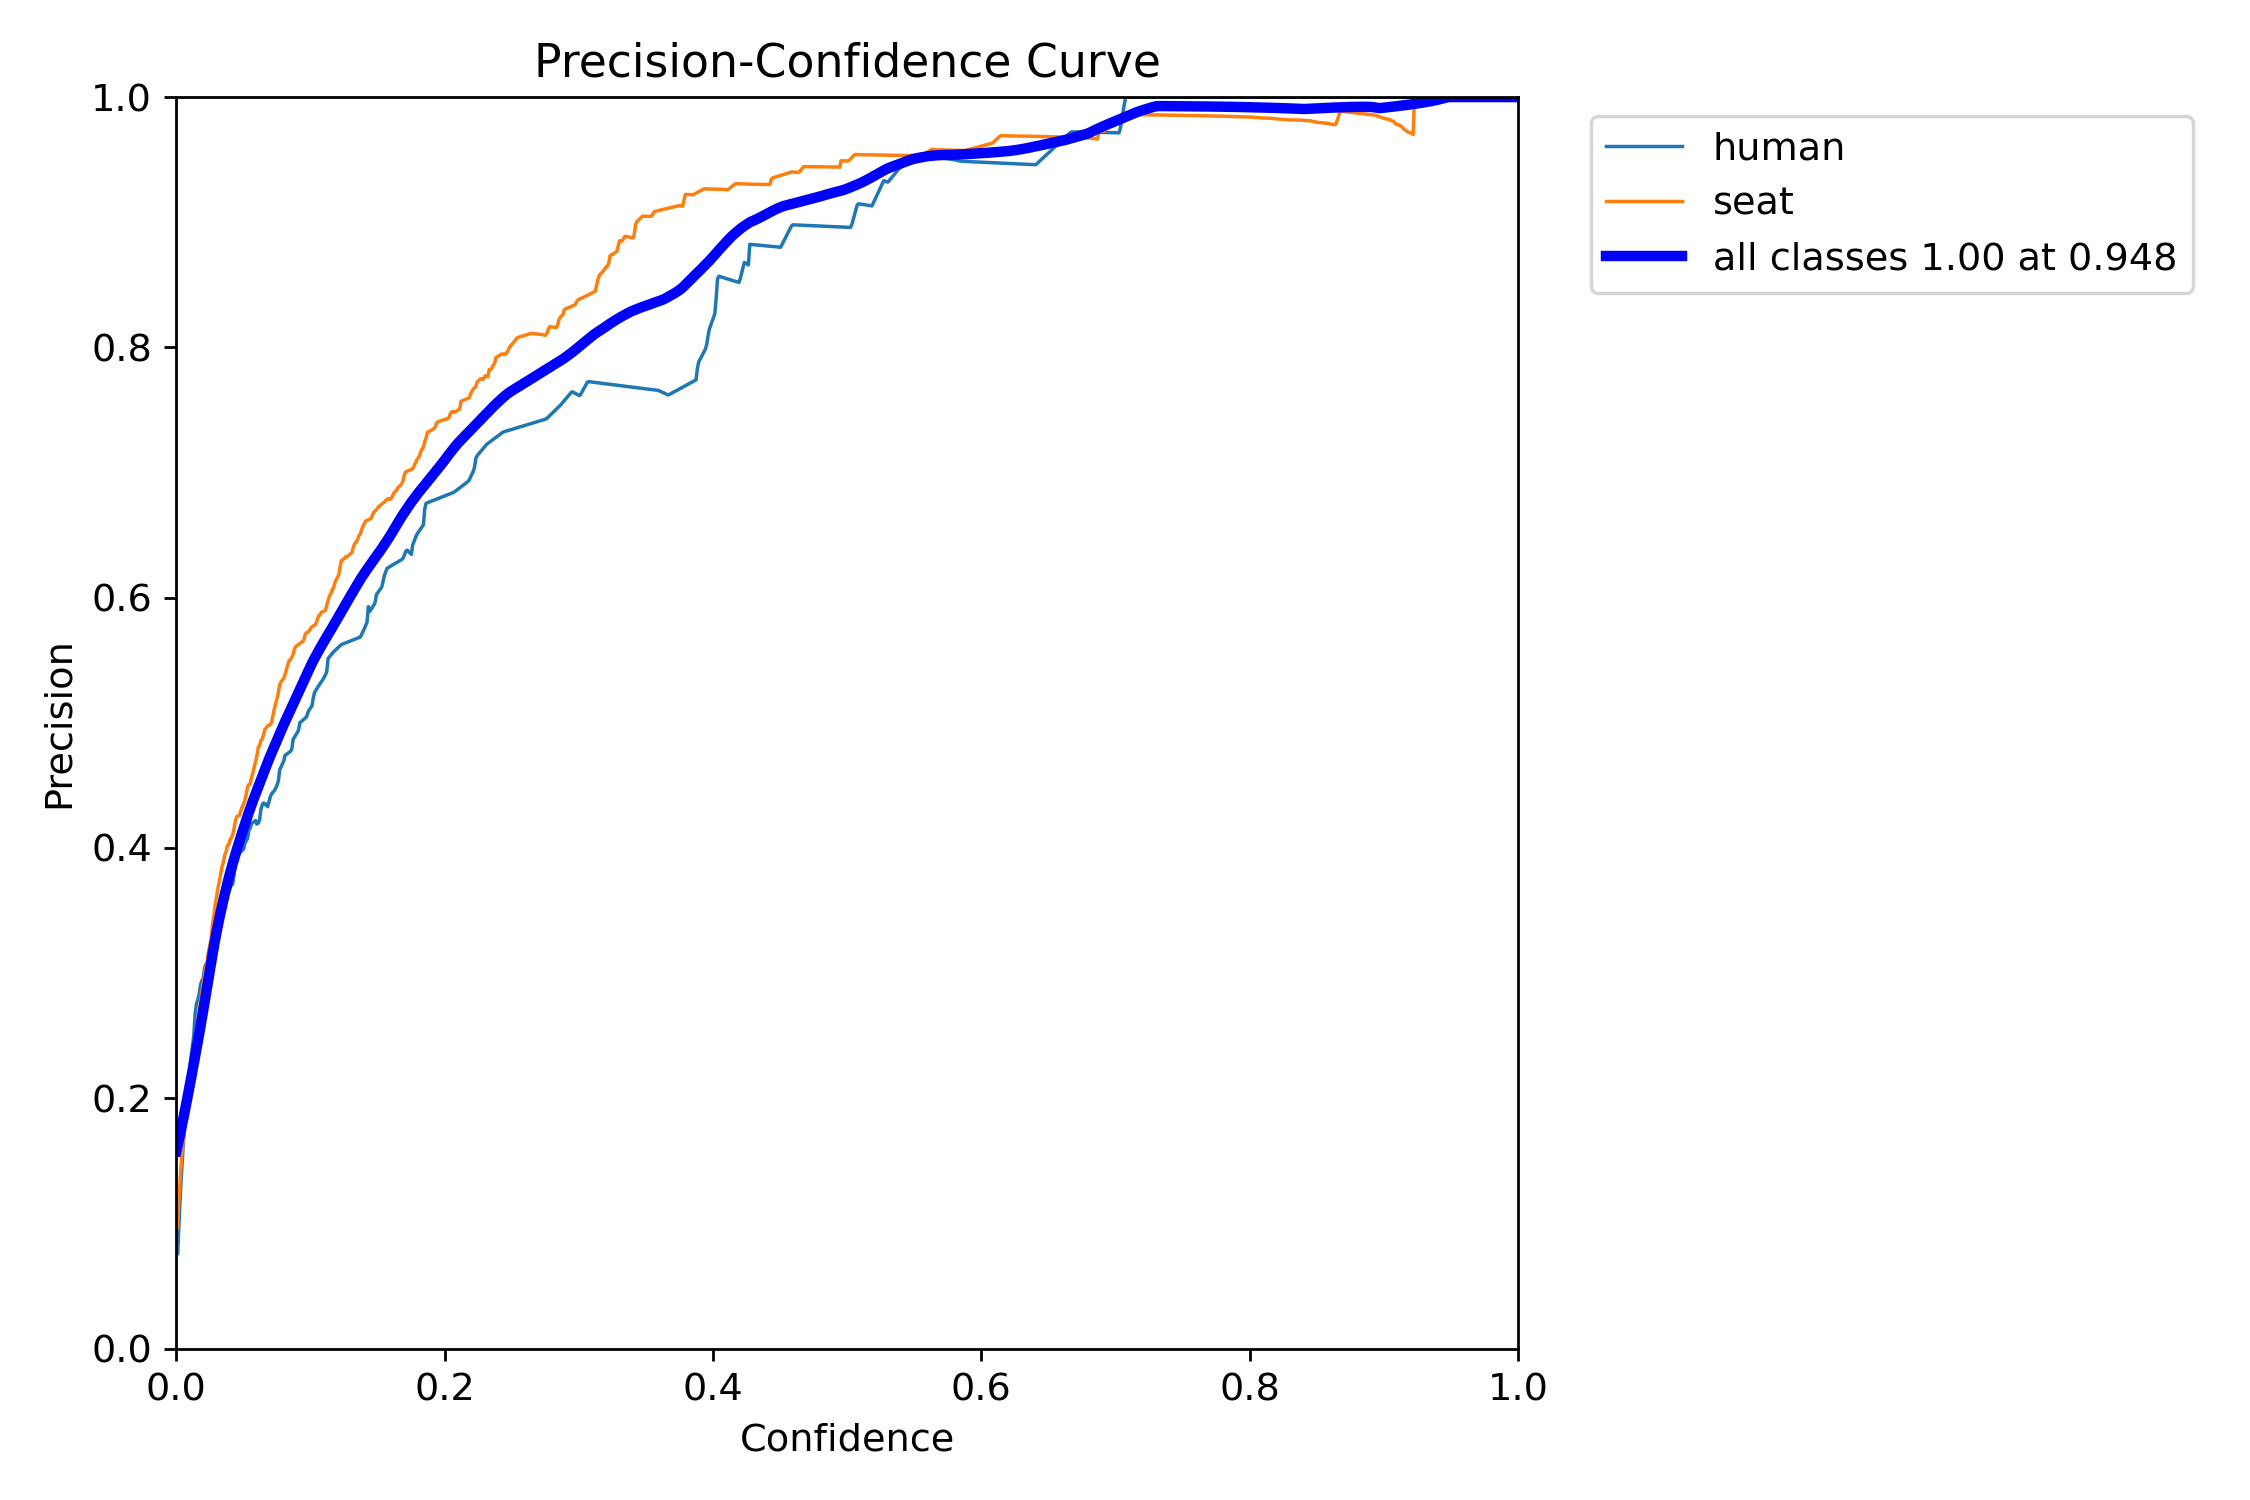

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

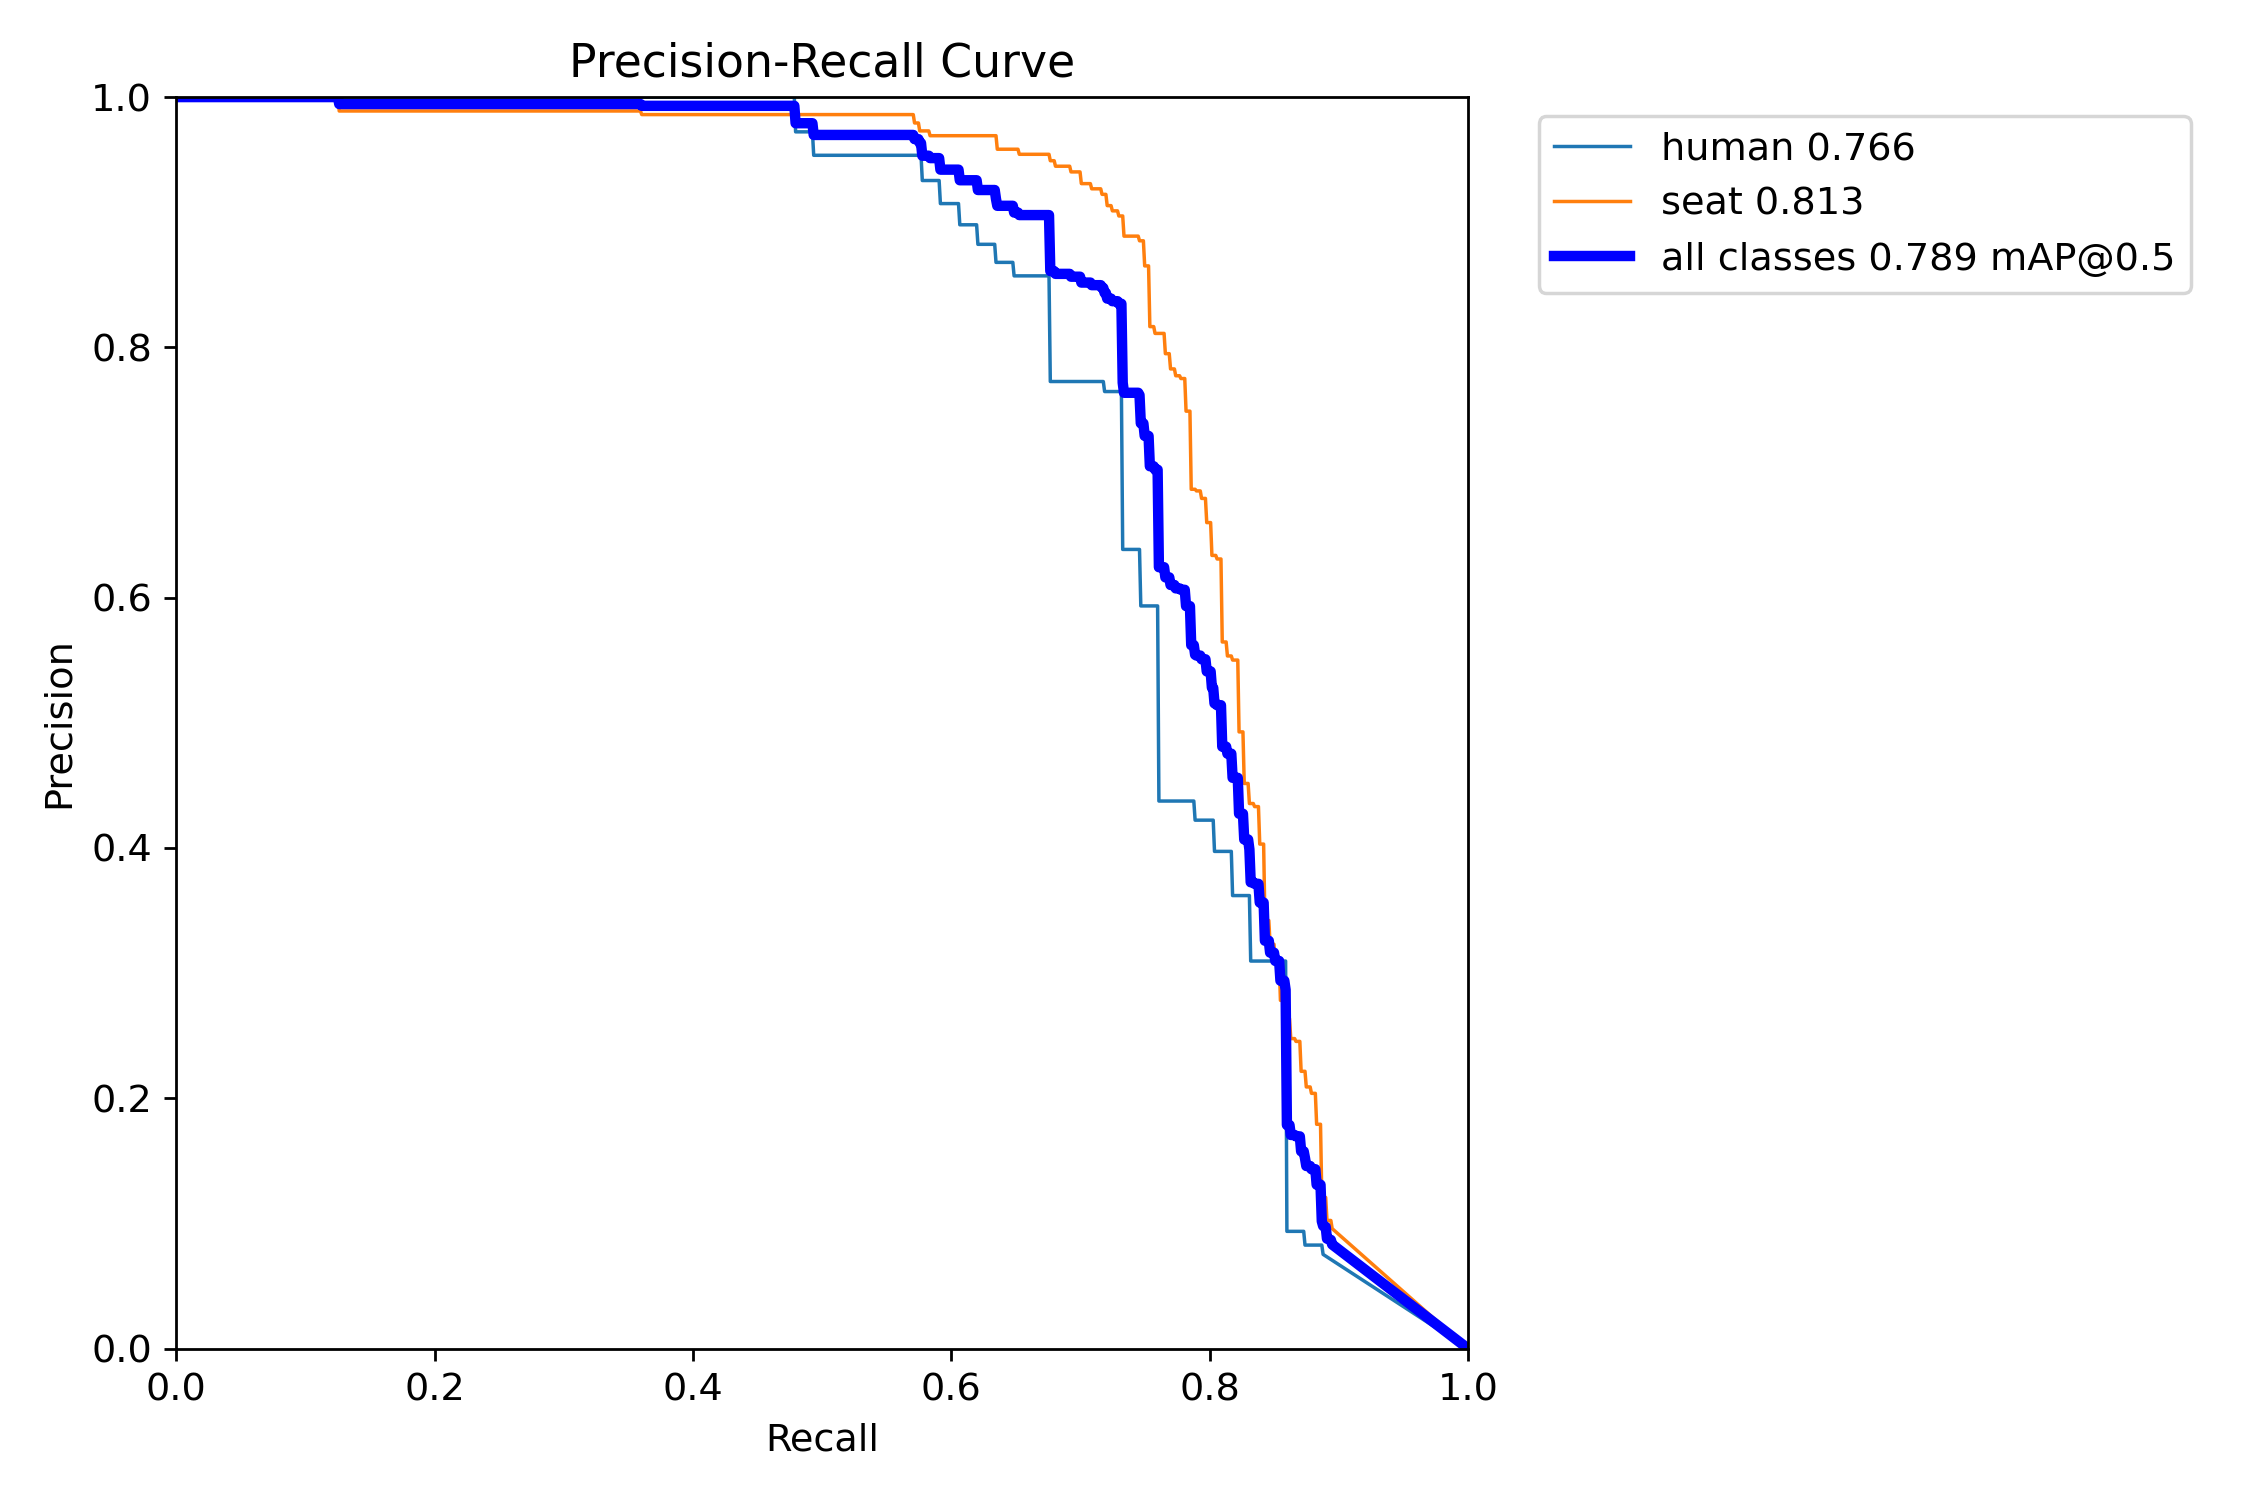

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

/content


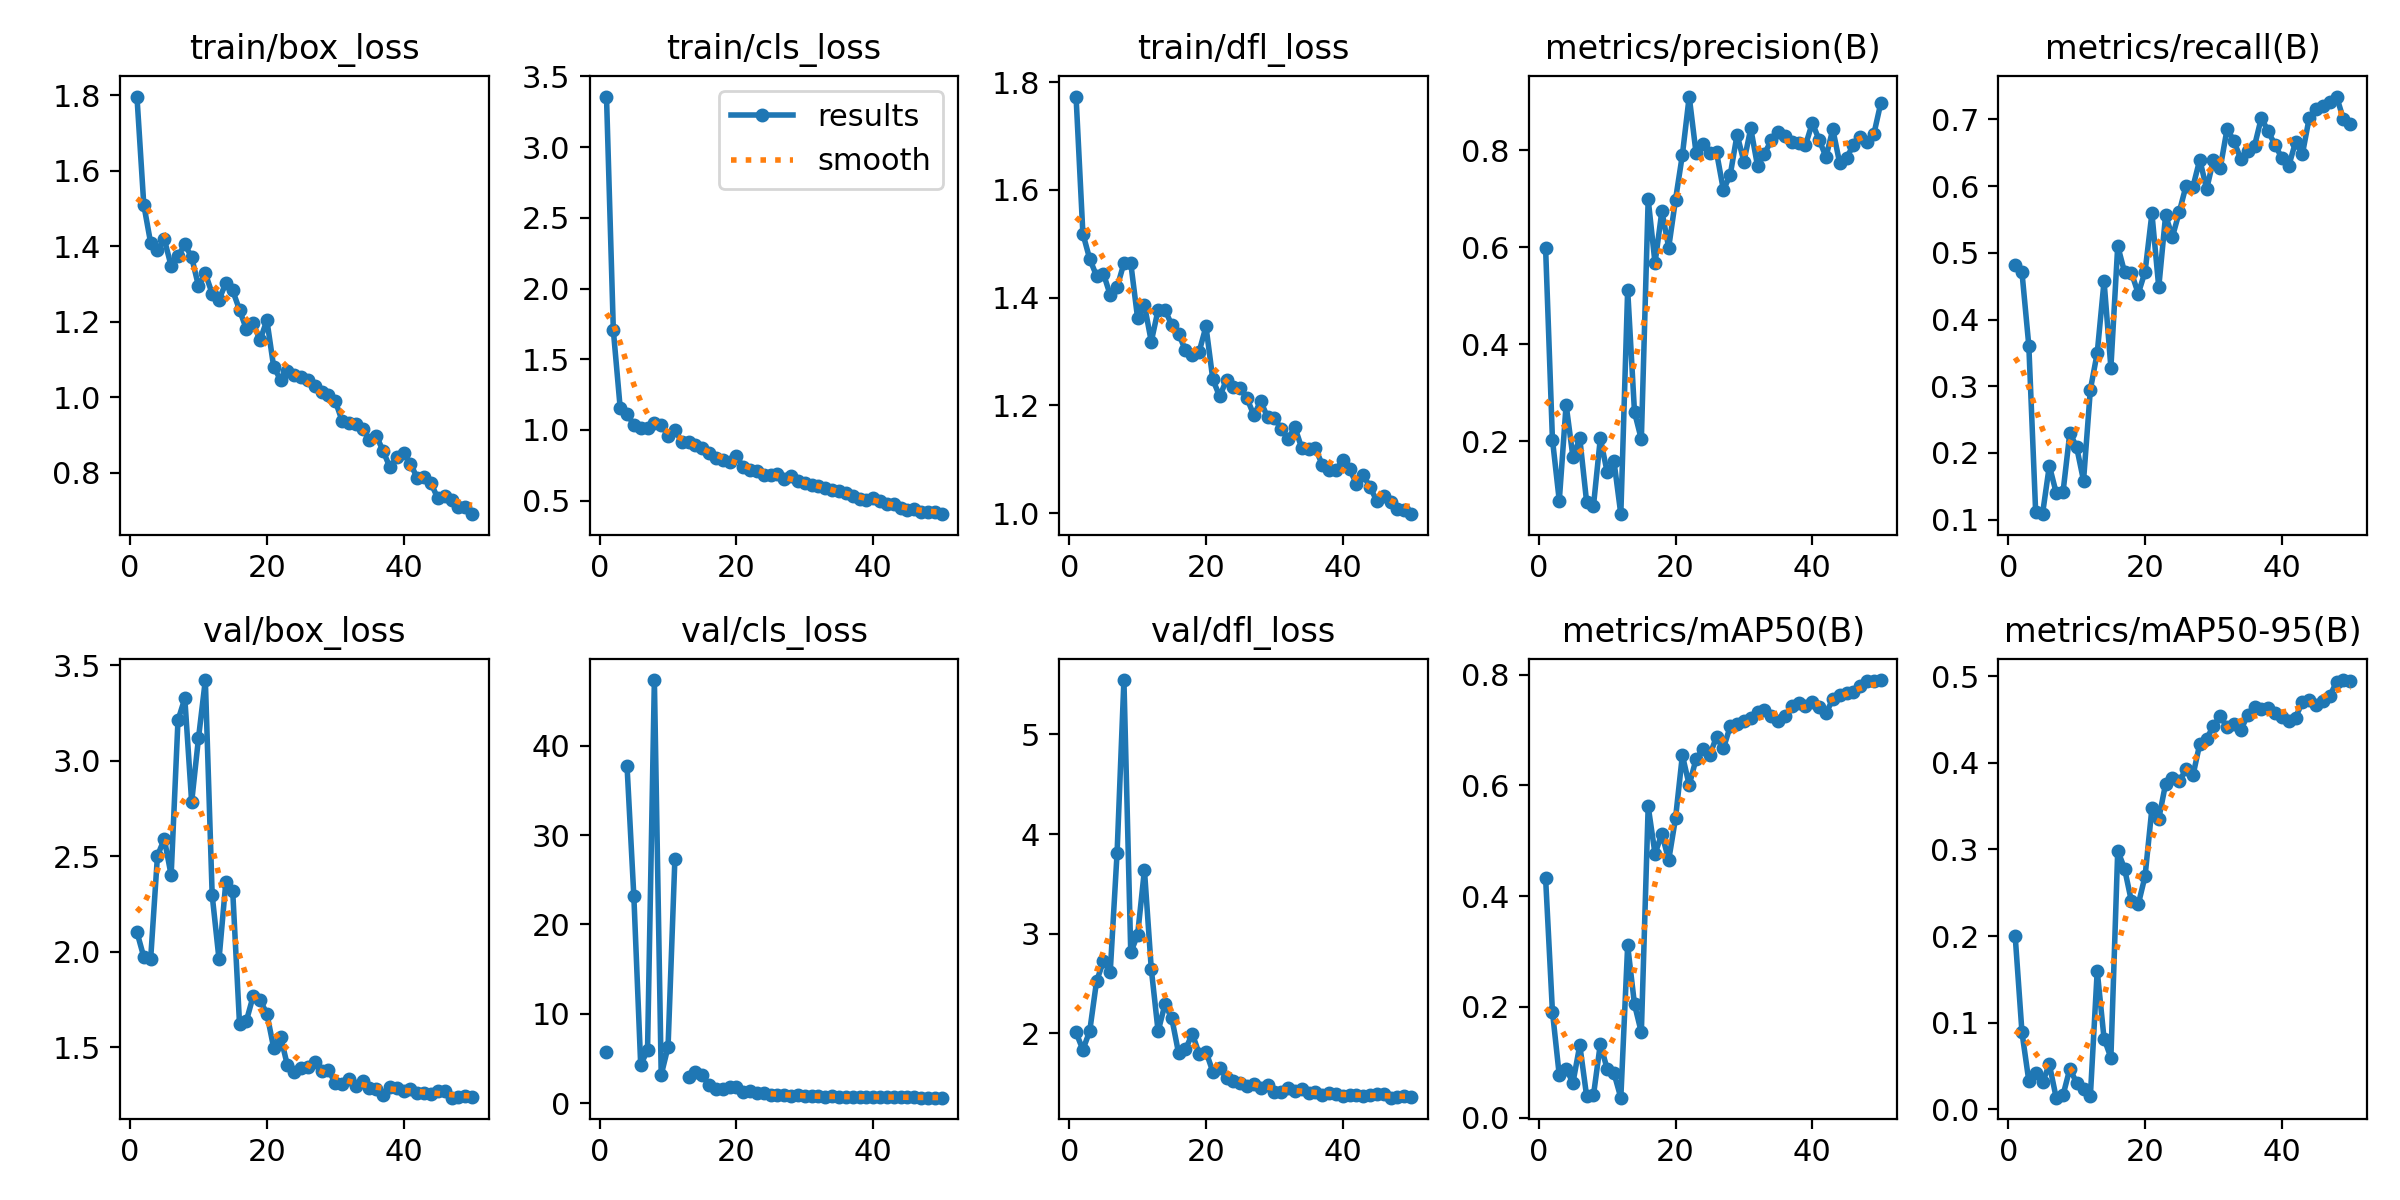

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=800, height = 400)

/content


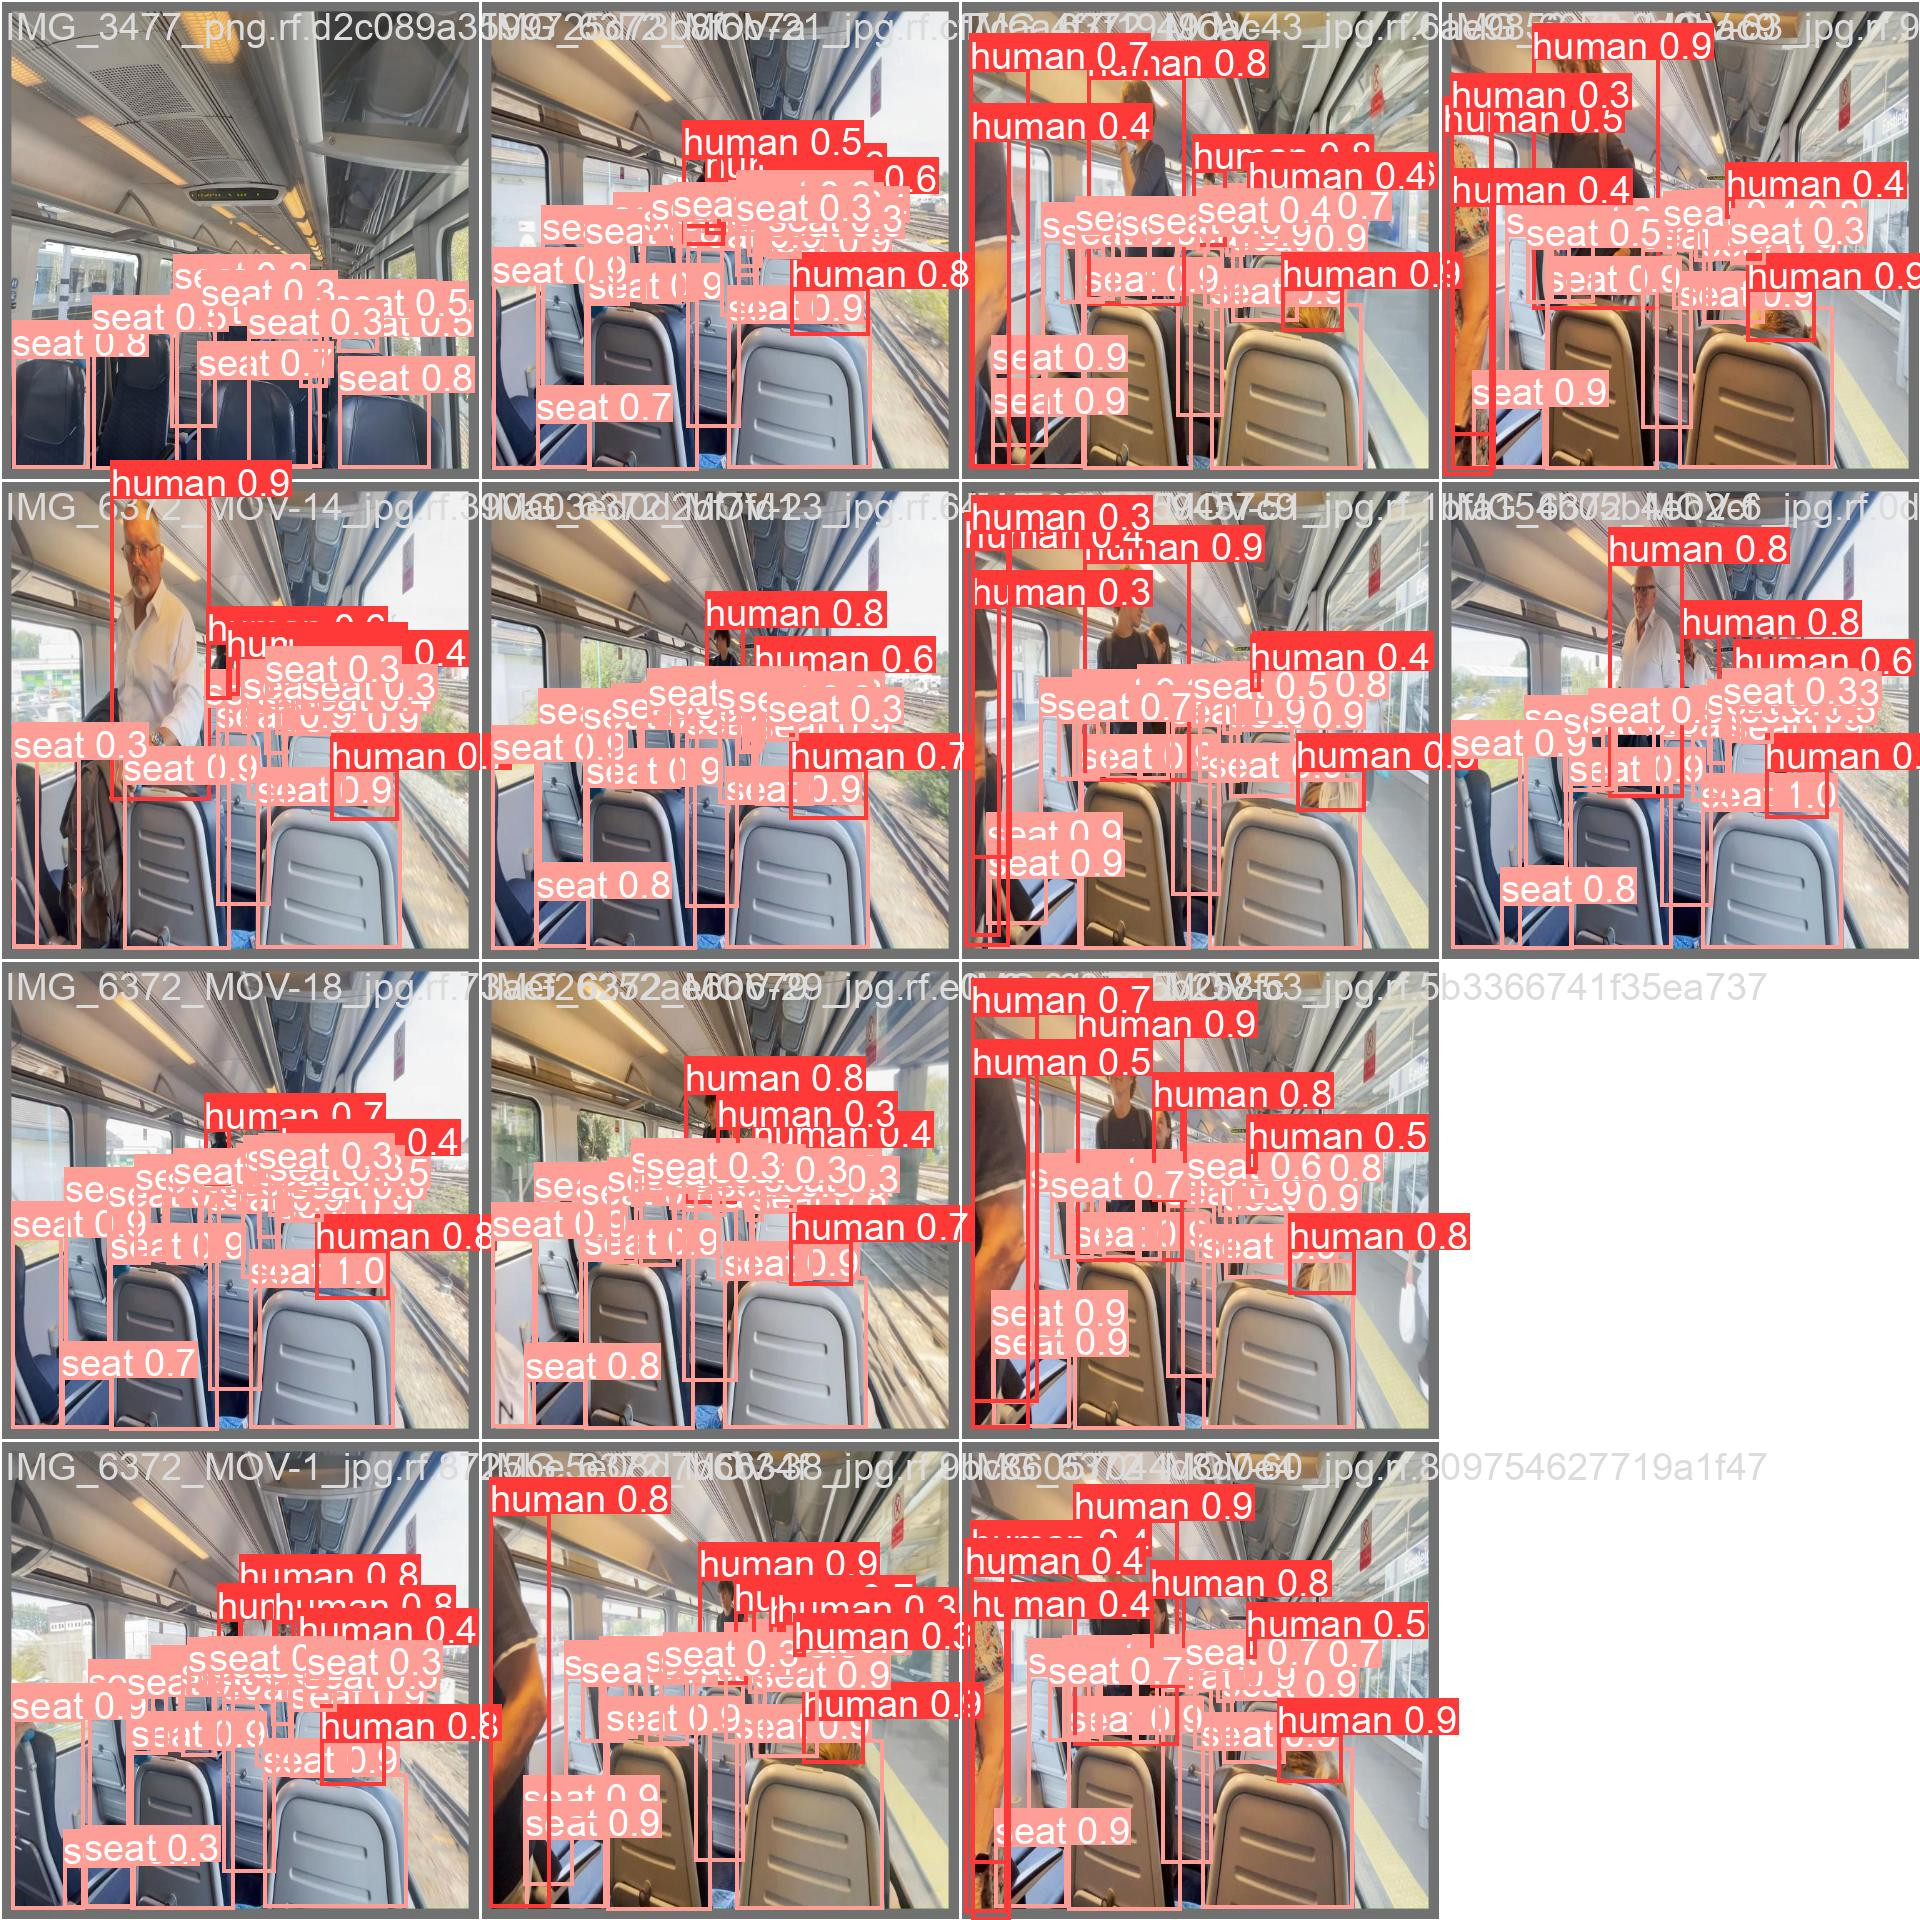

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=800)

## Validate Custom Model

In [ ]:
%cd {HOME}

metrics = model.val(mode = "val")

Ultralytics YOLOv8.0.206 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


/content


Model summary (fused): 268 layers, 68125494 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/datasets/Seats-railway-8/valid/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 33, len(boxes) = 318. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]
                   all         14        318      0.836      0.702      0.788      0.495
                 human         14         71      0.763       0.68      0.766      0.447
                  seat         14        247      0.908      0.723      0.811      0.543
Speed: 0.3ms preprocess, 67.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved 

## Inference with Custom Model

In [ ]:
%cd {HOME}


model(f"{dataset.location}/test/images", conf=0.25, save=True)

/content


image 1/13 /content/datasets/Seats-railway-8/test/images/IMG_3474_png.rf.513d881612aba86b04640eccc03ca11b.jpg: 640x640 1 human, 28 seats, 82.4ms
image 2/13 /content/datasets/Seats-railway-8/test/images/IMG_3479_png.rf.b877559456073b0a88d864a11cbb6a0f.jpg: 640x640 4 seats, 75.0ms
image 3/13 /content/datasets/Seats-railway-8/test/images/IMG_6372_MOV-12_jpg.rf.c0ff46377693cd9a73694dd51803947a.jpg: 640x640 6 humans, 23 seats, 73.9ms
image 4/13 /content/datasets/Seats-railway-8/test/images/IMG_6372_MOV-15_jpg.rf.ab8d4263db50bd1a1241366e5369985b.jpg: 640x640 7 humans, 20 seats, 53.8ms
image 5/13 /content/datasets/Seats-railway-8/test/images/IMG_6372_MOV-16_jpg.rf.4664689bd7d71f71a14f163a10b3c7a0.jpg: 640x640 6 humans, 22 seats, 51.1ms
image 6/13 /content/datasets/Seats-railway-8/test/images/IMG_6372_MOV-24_jpg.rf.afdcd52f4bd2596a6da8df2ef5ee8865.jpg: 640x640 3 humans, 20 seats, 50.4ms
image 7/13 /content/datasets/Seats-railway-8/test/images/IMG_6372_MOV-26_jpg.rf.386a0ff363dd1538bd43b82f53ca

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'human', 1: 'seat'}
 orig_img: array([[[140, 153, 161],
         [140, 153, 161],
         [140, 153, 161],
         ...,
         [105, 124, 145],
         [105, 124, 145],
         [105, 124, 145]],
 
        [[140, 153, 161],
         [140, 153, 161],
         [140, 153, 161],
         ...,
         [105, 124, 145],
         [105, 124, 145],
         [105, 124, 145]],
 
        [[140, 153, 161],
         [140, 153, 161],
         [140, 153, 161],
         ...,
         [105, 124, 145],
         [105, 124, 145],
         [105, 124, 145]],
 
        ...,
 
        [[108, 137, 211],
         [108, 137, 211],
         [110, 139, 213],
         ...,
         [214, 198, 162],
         [210, 194, 158],
         [202, 186, 150]],
 
        [[106, 135, 210],
         [107, 136, 211],
         [108, 137, 211],
         ...,
         [189, 171,

### few results.

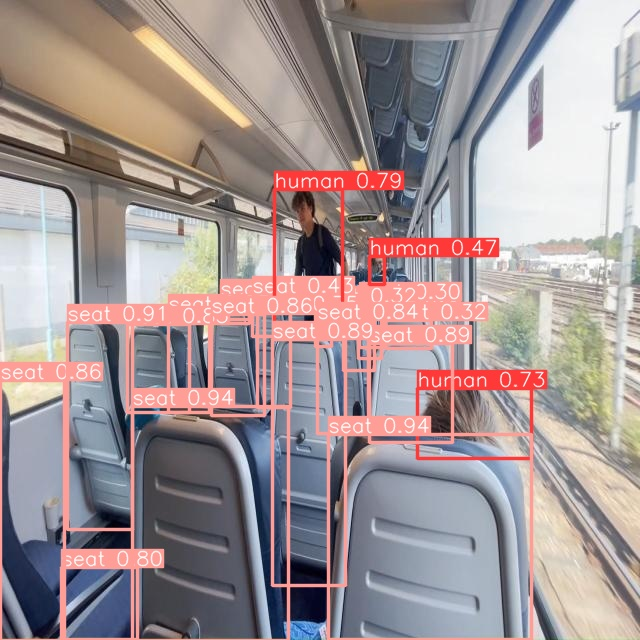

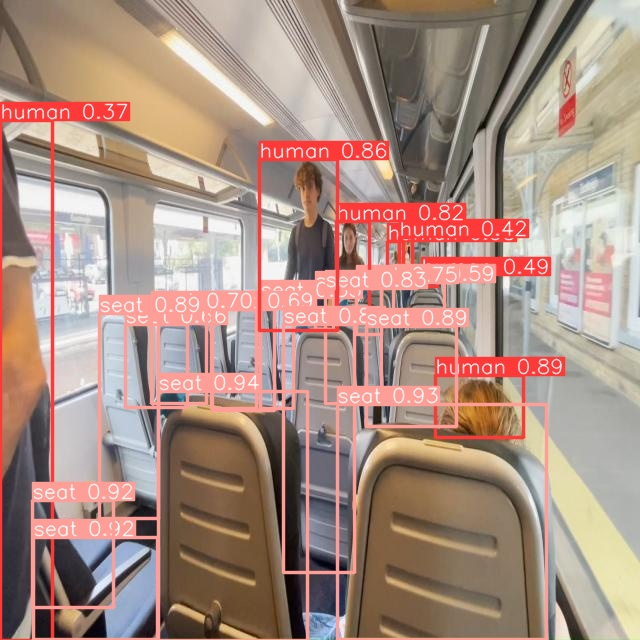

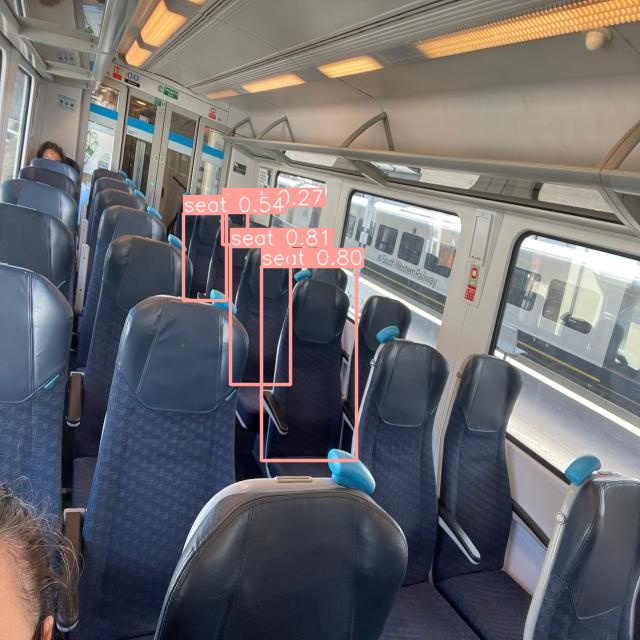

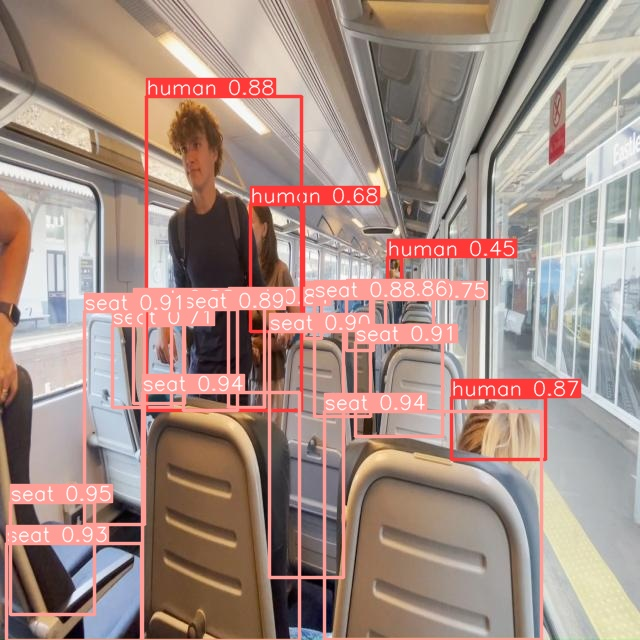

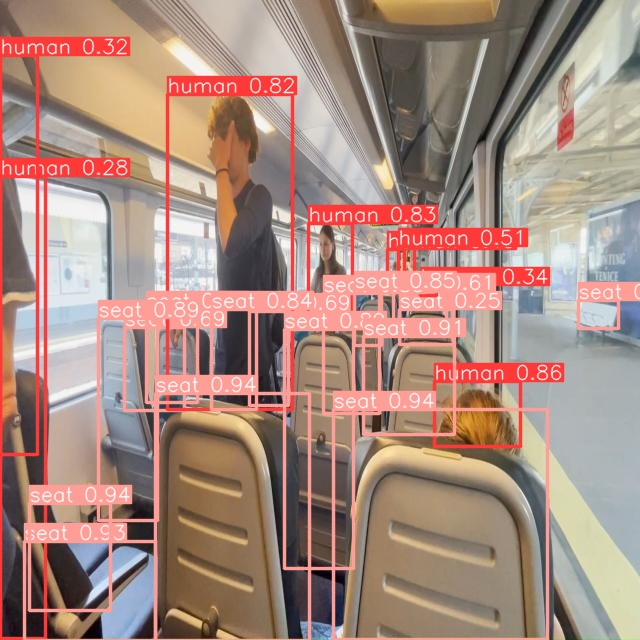

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/train3/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")